## AQI PREDICTION MODEL HAS BEEN DEVELOPED BASED ON DIFFERENT TECHNIQUES

**THE ORIGINAL DATASET HAS BEEN CONVERTED INTO TEST AND TRAIN WHERE TRAIN DATA HAS BEEN REVISED THREE TIMES IN ORDER TO CHECK THE ACCURACY.THE TECHNIQUES THAT WE HAVE USED ARE AS FOLLOWS**
1.   THE RIDGE TECHNIQUE
2.   THE BAYES TECHNQIUE
3.   THE ELASTIC NET TECHNIQUE

# THE RIDGE TECHNIQUE


***IN THIS TECHNIQUE WE HAVE TAKEN THE DATASET AFTER HANDLING THE MISSING VALUES AND APPLIED L1 REGULARIZATION TECHNIQUE CALLED RIDGE ON THAT DATASET AND APPLIED VARIOUS OTHER MACHINE LEARNING MODELS IN ORDER TO PREDICT THE VALUES .***

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading the dataset
df=pd.read_csv('./ridge/training_ridge.csv')

df_final_train=pd.read_csv('./bayes/testing_bayes.csv')
df_final_train.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene',
       'AQI', 'year', 'month', 'day', 'weekday', 'dayofyear', 'Date', 'City'],
      dtype='object')

In [ ]:
df = df.drop(['day','weekday','dayofyear'],axis=1)
df = df.drop(['month'],axis=1)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.91000,9.800000,2.860000,17.180000,12.134088,325.000000,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.78000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.71000,6.010000,0.480000,5.800000,3.031510,46.000000,2020.0,2020-04-20,Thiruvananthapuram
3,51.444474,142.311269,22.749114,12.857405,29.96521,10.478798,1.669762,23.740929,1.505868,159.222498,2020.0,2020-03-15,Talcher
4,16.660000,38.682937,7.440000,28.000000,23.79000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,2018-09-02,Lucknow


In [ ]:
X = df.drop(['AQI'],axis=1)
y = df['AQI']
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.91000,9.800000,2.860000,17.180000,12.134088,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.78000,15.920000,1.120000,8.240000,7.530000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.71000,6.010000,0.480000,5.800000,3.031510,2020.0,2020-04-20,Thiruvananthapuram
3,51.444474,142.311269,22.749114,12.857405,29.96521,10.478798,1.669762,23.740929,1.505868,2020.0,2020-03-15,Talcher
4,16.660000,38.682937,7.440000,28.000000,23.79000,28.830000,0.820000,5.030000,0.210000,2018.0,2018-09-02,Lucknow


In [ ]:
y

0        325.000000
1        128.000000
2         46.000000
3        159.222498
4         69.000000
            ...    
23619     70.000000
23620     73.000000
23621    293.518339
23622    101.000000
23623    111.000000
Name: AQI, Length: 23624, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene', 'year']

In [ ]:
categorical_cols = X.select_dtypes('object').columns.tolist()
categorical_cols = ['City']
scaler = StandardScaler().fit(X[numeric_cols])

In [ ]:
X[numeric_cols] = scaler.transform(X[numeric_cols])
X.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,23624.0,1.287302e-16,1.000021,-1.764046,-0.759672,-0.255846,0.436461,2.446566
PM10,23624.0,-6.917746e-17,1.000021,-1.791539,-0.765568,-0.229367,0.521200,3.017896
NO,23624.0,1.266248e-16,1.000021,-1.712910,-0.740877,-0.338494,0.474707,2.528467
NO2,23624.0,-1.798614e-16,1.000021,-2.356242,-0.776022,-0.281905,0.545455,2.602101
NOx,23624.0,4.669478e-17,1.000021,-1.607677,-0.735768,-0.237903,0.473517,2.702577
NH3,23624.0,5.173271e-17,1.000021,-1.461981,-0.747404,-0.212673,0.492367,2.805573
CO,23624.0,-9.203610e-17,1.000021,-1.355529,-0.698672,-0.238427,0.488274,2.449423
SO2,23624.0,-3.759645e-17,1.000021,-1.503045,-0.752713,-0.275796,0.478282,2.264424
Toluene,23624.0,4.150648e-17,1.000021,-2.424598,-0.755712,-0.351328,0.368546,2.396090
year,23624.0,7.537035e-15,1.000021,-1.892587,-0.586714,0.066222,0.719159,1.372095


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(X[categorical_cols])
encoder.categories_

[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X[encoded_cols] = encoder.transform(X[categorical_cols])
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,1.998127,1.800108,0.194956,0.376744,1.001172,-0.789963,2.123353,0.640583,0.927153,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381321,0.025804,-0.987149,0.022087,-0.567543,-0.369866,0.015918,-0.475552,0.239908,0.719159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.088503,-1.255691,-0.962105,-0.972416,-0.892501,-1.050121,-0.759230,-0.780179,-0.431575,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.204803,0.302670,0.665721,-0.718180,0.038487,-0.743368,0.681773,1.459698,-0.659305,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.048483,-1.105742,-0.612315,0.072752,-0.245343,0.516319,-0.347433,-0.876312,-0.852737,0.066222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
def try_model(model,name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds=model.predict(X_test)

    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(y_train, train_preds)

    test_r2_score = r2_score(y_test, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)

    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Test R2 Score': test_r2_score})

In [ ]:
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.9095847206524876
Test r2_score :  0.9113539717831839
----------------------------------------
Ridge Model:
Train r2_score :  0.9095845801442557
Test r2_score :  0.9113526374964793
----------------------------------------
SGDRegressor Model:
Train r2_score :  0.9095329227435885
Test r2_score :  0.9113385818479135
----------------------------------------
ElasticNet Model:
Train r2_score :  0.8301102628598751
Test r2_score :  0.8302002883798667
----------------------------------------
Lasso Model:
Train r2_score :  0.9025015647652723
Test r2_score :  0.9045868155524289
----------------------------------------
SVR Model:
Train r2_score :  0.9086953224548282
Test r2_score :  0.9109179806401547
----------------------------------------
GradientBoostingRegressor Model:
Train r2_score :  0.9416982989176348
Test r2_score :  0.9416036765577862
----------------------------------------


## Decision Tree Model for Ridge Technique

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
try_model(tree,name="DecisionTreeRegressor")

DecisionTreeRegressor Model:
Train r2_score :  0.9999999489558375
Test r2_score :  0.90736642751089
----------------------------------------


## Random Forest Model for Ridge Technique

In [ ]:
rf = RandomForestRegressor(random_state=42,n_estimators = 1000)
try_model(rf,name="RandomForestRegressor")

RandomForestRegressor Model:
Train r2_score :  0.9933286380350371
Test r2_score :  0.9551655918702171
----------------------------------------


In [ ]:
rf.feature_importances_

array([5.89757733e-01, 1.22901786e-01, 2.89415160e-02, 5.60535217e-03,
       6.01168663e-03, 7.00234481e-03, 2.44290272e-02, 5.90794791e-03,
       7.27464009e-03, 5.99098376e-03, 1.87547551e-01, 2.08146532e-06,
       1.00726795e-04, 2.09451064e-04, 1.16027142e-03, 1.08944477e-04,
       2.38854333e-04, 7.40643914e-05, 7.54874348e-04, 1.90253872e-05,
       1.73992154e-03, 2.82081119e-06, 6.04288606e-04, 2.64962790e-04,
       8.94513840e-04, 3.02489303e-04, 4.25479069e-04, 9.78461085e-06,
       1.02010796e-04, 6.25600800e-04, 6.84760583e-05, 5.64901154e-04,
       4.93159332e-06, 1.65314602e-04, 4.18044961e-05, 1.43836874e-04])

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,PM2.5,0.589758
10,City_Ahmedabad,0.187548
1,PM10,0.122902
2,NO,0.028942
6,CO,0.024429
8,Toluene,0.007275
5,NH3,0.007002
4,NOx,0.006012
9,year,0.005991
7,SO2,0.005908


## Gradient Boosting Regressor For Ridge Technique


In [ ]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [ ]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.9525978120341584


In [ ]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, y_train)
train_preds = best_model.predict(X_train)

test_preds=best_model.predict(X_test)

train_r2_score = r2_score(y_train, train_preds)

test_r2_score = r2_score(y_test, test_preds)

print("Train r2_score : ", train_r2_score)

print("Test r2_score : ", test_r2_score)

Train r2_score :  0.9830070584344563
Test r2_score :  0.9570563409103041


In [ ]:
#final test on best model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score

# Load the data
df_final_train = pd.read_csv('./ridge/testing_ridge.csv')

# Drop unnecessary columns
df_final_train = df_final_train.drop(['day', 'weekday', 'dayofyear', 'month'], axis=1)

# Split into features and target
X_final_ridge = df_final_train.drop(['AQI'], axis=1)
y_final_ridge = df_final_train['AQI']

# Select numeric and categorical columns
numeric_cols = X_final_ridge.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['City']  # As per your setup

# Apply the same scaling as in training
scaler = StandardScaler().fit(X_final_ridge[numeric_cols])
X_final_ridge[numeric_cols] = scaler.transform(X_final_ridge[numeric_cols])

# Apply the same encoding as in training
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_final_ridge[categorical_cols])

# Get encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform categorical columns
X_final_ridge[encoded_cols] = encoder.transform(X_final_ridge[categorical_cols])

# Drop the original categorical columns after encoding
X_final_ridge = X_final_ridge.drop(categorical_cols, axis=1)

# Ensure the feature columns match those during training
X_final_ridge = X_final_ridge.reindex(columns=best_model.feature_names_in_, fill_value=0)

# Predict with the best model
final_test_preds = best_model.predict(X_final_ridge)

# Calculate the R^2 score
final_test_r2_score = r2_score(y_final_ridge, final_test_preds)
print("Final Test R^2 Score:", final_test_r2_score)

Final Test R^2 Score: 0.9483244686706843


In [ ]:
X_final_ridge.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene',
       'year', 'City_Ahmedabad', 'City_Aizawl', 'City_Amaravati',
       'City_Amritsar', 'City_Bengaluru', 'City_Bhopal', 'City_Brajrajnagar',
       'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Gurugram', 'City_Guwahati', 'City_Hyderabad',
       'City_Jaipur', 'City_Jorapokhar', 'City_Kochi', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Patna', 'City_Shillong',
       'City_Talcher', 'City_Thiruvananthapuram', 'City_Visakhapatnam'],
      dtype='object')

In [ ]:
X_train.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene',
       'year', 'City_Ahmedabad', 'City_Aizawl', 'City_Amaravati',
       'City_Amritsar', 'City_Bengaluru', 'City_Bhopal', 'City_Brajrajnagar',
       'City_Chandigarh', 'City_Chennai', 'City_Coimbatore', 'City_Delhi',
       'City_Ernakulam', 'City_Gurugram', 'City_Guwahati', 'City_Hyderabad',
       'City_Jaipur', 'City_Jorapokhar', 'City_Kochi', 'City_Kolkata',
       'City_Lucknow', 'City_Mumbai', 'City_Patna', 'City_Shillong',
       'City_Talcher', 'City_Thiruvananthapuram', 'City_Visakhapatnam'],
      dtype='object')

## Visualization of all the models applied under Ridge technique

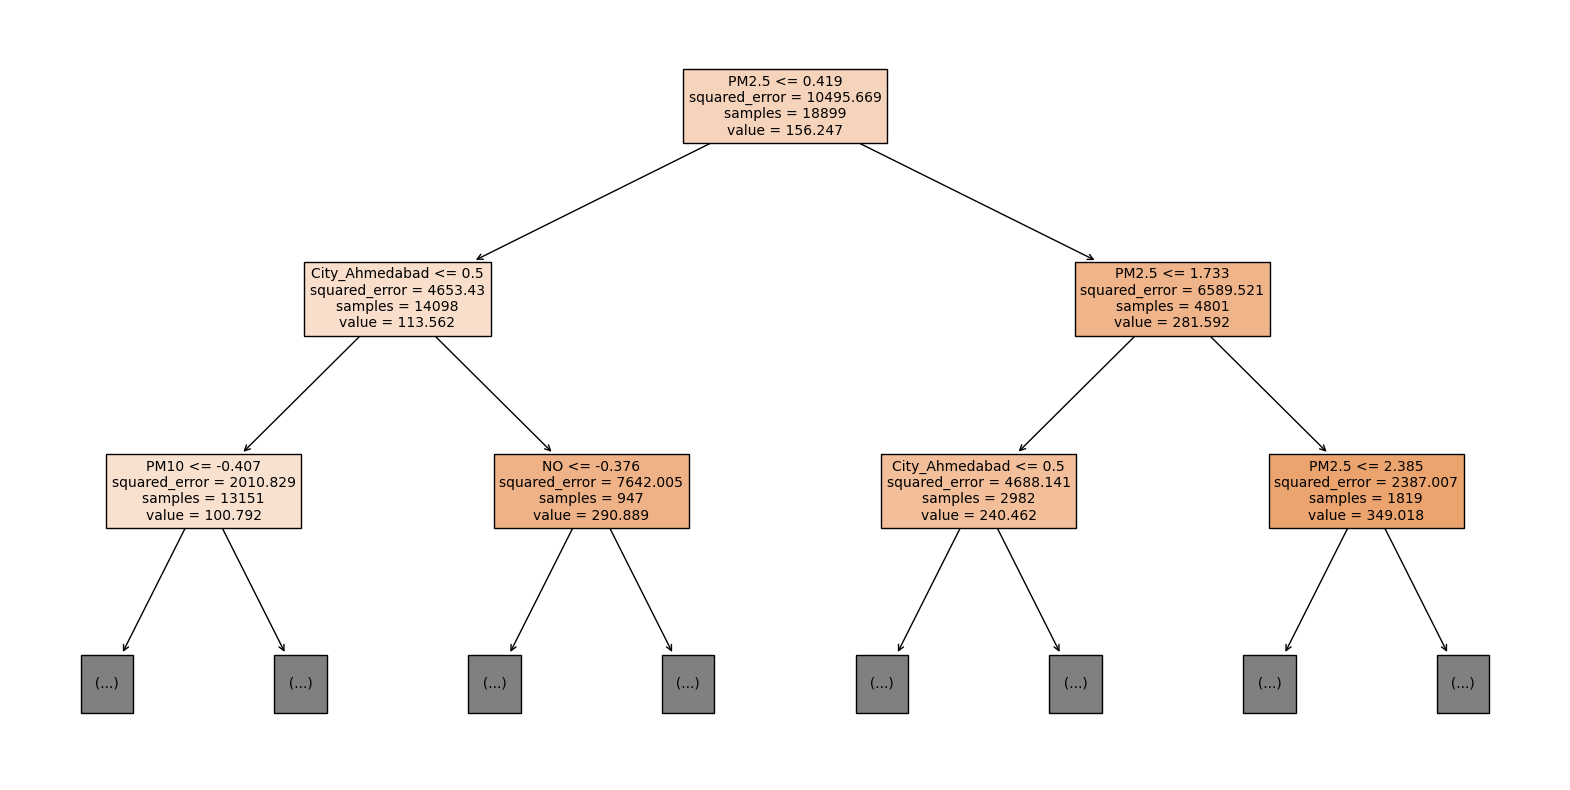

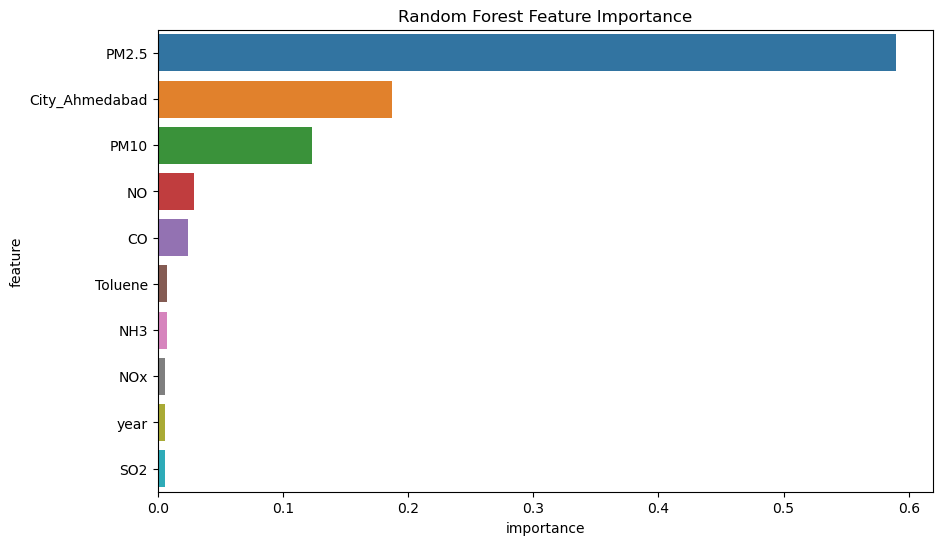

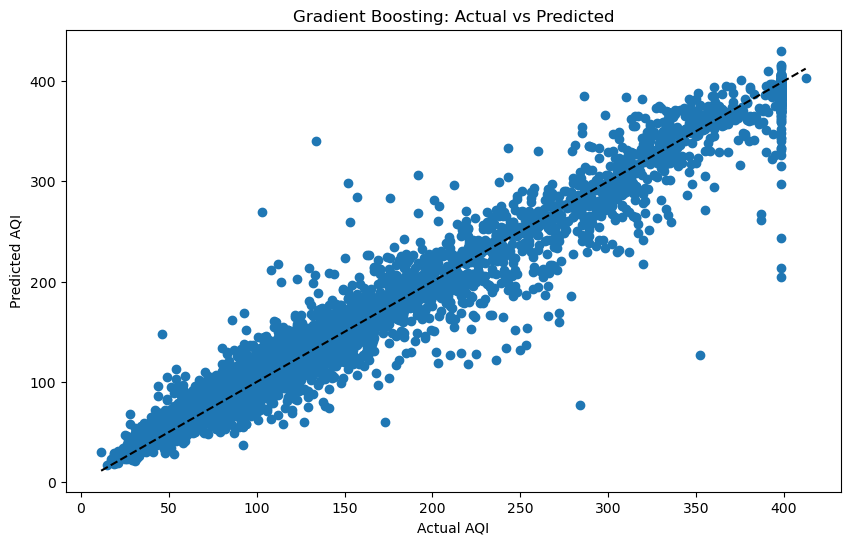

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=2, fontsize=10)
plt.show()

# Visualize Random Forest Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize Gradient Boosting Predictions vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()


# THE BAYES TECHNIQUE

***Bayesian regression is a statistical technique that applies Bayesian methods to the problem of linear regression. It differs from traditional (frequentist) linear regression by incorporating prior distributions over the model parameters, which are then updated with data to produce posterior distributions.***

In [ ]:
df1 = pd.read_csv('./bayes/training_bayes.csv')
df1

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,12.180105,325.000000,2018.0,3.0,13.0,1.0,72.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,12.0,17.0,1.0,351.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,3.022075,46.000000,2020.0,4.0,20.0,0.0,111.0,2020-04-20,Thiruvananthapuram
3,51.226705,141.931893,22.695044,12.817709,29.873171,10.470932,1.666053,23.719064,1.540898,158.786662,2020.0,3.0,15.0,6.0,75.0,2020-03-15,Talcher
4,16.660000,38.762942,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,9.0,2.0,6.0,245.0,2018-09-02,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23619,21.750000,51.666007,7.970000,18.640000,16.240000,2.020000,0.910000,4.190000,3.610000,70.000000,2019.0,9.0,26.0,3.0,269.0,2019-09-26,Lucknow
23620,38.060000,74.540000,9.910000,42.230000,22.620000,25.490696,1.040000,3.200000,2.600089,73.000000,2018.0,1.0,1.0,0.0,1.0,2018-01-01,Bengaluru
23621,54.461156,112.325578,16.153580,40.531048,37.174985,21.487540,2.601051,23.998156,13.507181,291.753921,2017.0,5.0,10.0,2.0,130.0,2017-05-10,Ahmedabad
23622,36.080000,95.820000,5.670000,31.210000,18.750000,15.340000,0.700000,5.920000,3.810000,101.000000,2018.0,5.0,2.0,2.0,122.0,2018-05-02,Hyderabad


In [ ]:
df1 = df1.drop(['day','weekday','dayofyear'],axis=1)
df1 = df1.drop(['month'],axis=1)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,12.180105,325.000000,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,3.022075,46.000000,2020.0,2020-04-20,Thiruvananthapuram
3,51.226705,141.931893,22.695044,12.817709,29.873171,10.470932,1.666053,23.719064,1.540898,158.786662,2020.0,2020-03-15,Talcher
4,16.660000,38.762942,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,2018-09-02,Lucknow


In [ ]:
X = df1.drop(['AQI'],axis=1)
y = df1['AQI']
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,12.180105,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,3.022075,2020.0,2020-04-20,Thiruvananthapuram
3,51.226705,141.931893,22.695044,12.817709,29.873171,10.470932,1.666053,23.719064,1.540898,2020.0,2020-03-15,Talcher
4,16.660000,38.762942,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,2018.0,2018-09-02,Lucknow


In [ ]:
y

0        325.000000
1        128.000000
2         46.000000
3        158.786662
4         69.000000
            ...    
23619     70.000000
23620     73.000000
23621    291.753921
23622    101.000000
23623    111.000000
Name: AQI, Length: 23624, dtype: float64

In [ ]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene', 'year']

In [ ]:
categorical_cols = X.select_dtypes('object').columns.tolist()
categorical_cols = ['City']
scaler = StandardScaler().fit(X[numeric_cols])
X[numeric_cols] = scaler.transform(X[numeric_cols])

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,23624.0,-3.549104e-17,1.000021,-1.767442,-0.759321,-0.256124,0.437718,2.443676
PM10,23624.0,1.076762e-16,1.000021,-1.790907,-0.765819,-0.229361,0.519953,3.017854
NO,23624.0,-1.524912e-16,1.000021,-1.708767,-0.740950,-0.338306,0.473922,2.521577
NO2,23624.0,3.128024e-17,1.000021,-2.355423,-0.775922,-0.281501,0.545104,2.602304
NOx,23624.0,1.030143e-16,1.000021,-1.608610,-0.736209,-0.236930,0.473183,2.693591
NH3,23624.0,-6.616974e-17,1.000021,-1.462284,-0.747602,-0.212249,0.492442,2.805900
CO,23624.0,7.759906e-17,1.000021,-1.354858,-0.698762,-0.238458,0.488337,2.447898
SO2,23624.0,-1.894861e-16,1.000021,-1.503129,-0.752721,-0.275756,0.478398,2.263297
Toluene,23624.0,-1.744475e-17,1.000021,-2.406322,-0.756160,-0.351299,0.368263,2.396733
year,23624.0,7.537035e-15,1.000021,-1.892587,-0.586714,0.066222,0.719159,1.372095


In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(X[categorical_cols])
encoder.categories_

[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [ ]:
X[encoded_cols] = encoder.transform(X[categorical_cols])
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,1.997716,1.800270,0.195232,0.376778,1.001343,-0.790167,2.123628,0.640716,0.934159,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381179,0.025829,-0.987068,0.022093,-0.567510,-0.370008,0.015920,-0.475532,0.239805,0.719159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.088400,-1.255764,-0.962019,-0.972485,-0.892497,-1.050363,-0.759329,-0.780190,-0.433319,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.210128,0.297560,0.661559,-0.720304,0.034344,-0.744105,0.677369,1.457183,-0.654488,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.048387,-1.104717,-0.612172,0.072763,-0.245281,0.516308,-0.347478,-0.876332,-0.853218,0.066222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23619,-0.924952,-0.929338,-0.567919,-0.416169,-0.592332,-1.324291,-0.238458,-0.981215,-0.345530,0.719159,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23620,-0.529427,-0.618434,-0.405937,0.816085,-0.299063,0.287053,-0.080986,-1.104826,-0.496330,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23621,-0.131691,-0.104850,0.115375,0.727338,0.369986,0.012223,1.809956,1.492031,1.132318,-0.586714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23622,-0.577442,-0.329195,-0.759959,0.240441,-0.476955,-0.409827,-0.492837,-0.765207,-0.315666,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

In [ ]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
def try_model(model,name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds=model.predict(X_test)

    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(y_train, train_preds)

    test_r2_score = r2_score(y_test, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)

    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Test R2 Score': test_r2_score})

In [ ]:
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.9044571350119031
Test r2_score :  0.9062915933038206
----------------------------------------
Ridge Model:
Train r2_score :  0.909581937502857
Test r2_score :  0.9113504580243093
----------------------------------------
SGDRegressor Model:
Train r2_score :  0.9094831725412518
Test r2_score :  0.9110557043793961
----------------------------------------
ElasticNet Model:
Train r2_score :  0.8302012286828389
Test r2_score :  0.8302984777822237
----------------------------------------
Lasso Model:
Train r2_score :  0.9025080575386423
Test r2_score :  0.9045955272921993
----------------------------------------
SVR Model:
Train r2_score :  0.9087148839050594
Test r2_score :  0.9109417244848557
----------------------------------------
GradientBoostingRegressor Model:
Train r2_score :  0.9416461007703211
Test r2_score :  0.9411940019547357
----------------------------------------


## Descision Tree model for Bayesian Technique

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
try_model(tree,name="DecisionTreeRegressor")

DecisionTreeRegressor Model:
Train r2_score :  0.9999999489492551
Test r2_score :  0.9098340942133949
----------------------------------------


## Random Forest model for Bayesian Technique

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1,n_estimators = 1000)
try_model(rf,name="RandomForestRegressor")

RandomForestRegressor Model:
Train r2_score :  0.9933236082861767
Test r2_score :  0.955262780795822
----------------------------------------


In [ ]:
rf.feature_importances_

array([5.86511471e-01, 1.26649892e-01, 2.87974878e-02, 5.61665189e-03,
       6.03541828e-03, 6.97993924e-03, 2.43684091e-02, 5.87189140e-03,
       7.30096541e-03, 6.05312918e-03, 1.87171747e-01, 3.03359189e-06,
       1.00275159e-04, 2.13773410e-04, 1.19367395e-03, 1.08338293e-04,
       2.40116119e-04, 7.35132215e-05, 7.52639549e-04, 1.84566674e-05,
       1.72159383e-03, 2.70376503e-06, 6.09908453e-04, 2.62367306e-04,
       8.93829067e-04, 2.99115850e-04, 4.28371330e-04, 1.05440258e-05,
       1.00941889e-04, 6.15927854e-04, 6.86896272e-05, 5.61285225e-04,
       5.32500002e-06, 1.70802270e-04, 4.31662405e-05, 1.44605278e-04])

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,PM2.5,0.586511
10,City_Ahmedabad,0.187172
1,PM10,0.126650
2,NO,0.028797
6,CO,0.024368
8,Toluene,0.007301
5,NH3,0.006980
9,year,0.006053
4,NOx,0.006035
7,SO2,0.005872


## Gradient Boosting Regressor Model for Bayesian Technique

In [ ]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [ ]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.9525864922225613


In [ ]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, y_train)
train_preds = best_model.predict(X_train)

test_preds=best_model.predict(X_test)

train_r2_score = r2_score(y_train, train_preds)

test_r2_score = r2_score(y_test, test_preds)

print("Train r2_score : ", train_r2_score)

print("Test r2_score : ", test_r2_score)

Train r2_score :  0.9831806758803868
Test r2_score :  0.9569400141072859


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score

# Load the data
df_final_train = pd.read_csv('./bayes/testing_bayes.csv')

# Drop unnecessary columns
df_final_train = df_final_train.drop(['day', 'weekday', 'dayofyear', 'month'], axis=1)

# Split into features and target
X_final_bayes = df_final_train.drop(['AQI'], axis=1)
y_final_bayes = df_final_train['AQI']

# Select numeric and categorical columns
numeric_cols = X_final_bayes.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['City']  # As per your setup

# Apply the same scaling as in training
scaler = StandardScaler().fit(X_final_bayes[numeric_cols])
X_final_bayes[numeric_cols] = scaler.transform(X_final_bayes[numeric_cols])

# Apply the same encoding as in training
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_final_bayes[categorical_cols])

# Get encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform categorical columns
X_final_bayes[encoded_cols] = encoder.transform(X_final_bayes[categorical_cols])

# Drop the original categorical columns after encoding
X_final_bayes = X_final_bayes.drop(categorical_cols, axis=1)

# Ensure the feature columns match those during training
X_final_bayes = X_final_bayes.reindex(columns=best_model.feature_names_in_, fill_value=0)

# Predict with the best model
final_test_preds = best_model.predict(X_final_bayes)

# Calculate the R^2 score
final_test_r2_score = r2_score(y_final_bayes, final_test_preds)
print("Final Test R^2 Score:", final_test_r2_score)

Final Test R^2 Score: 0.9488603669328601


## Visualization of all the models applied under Bayesian technique

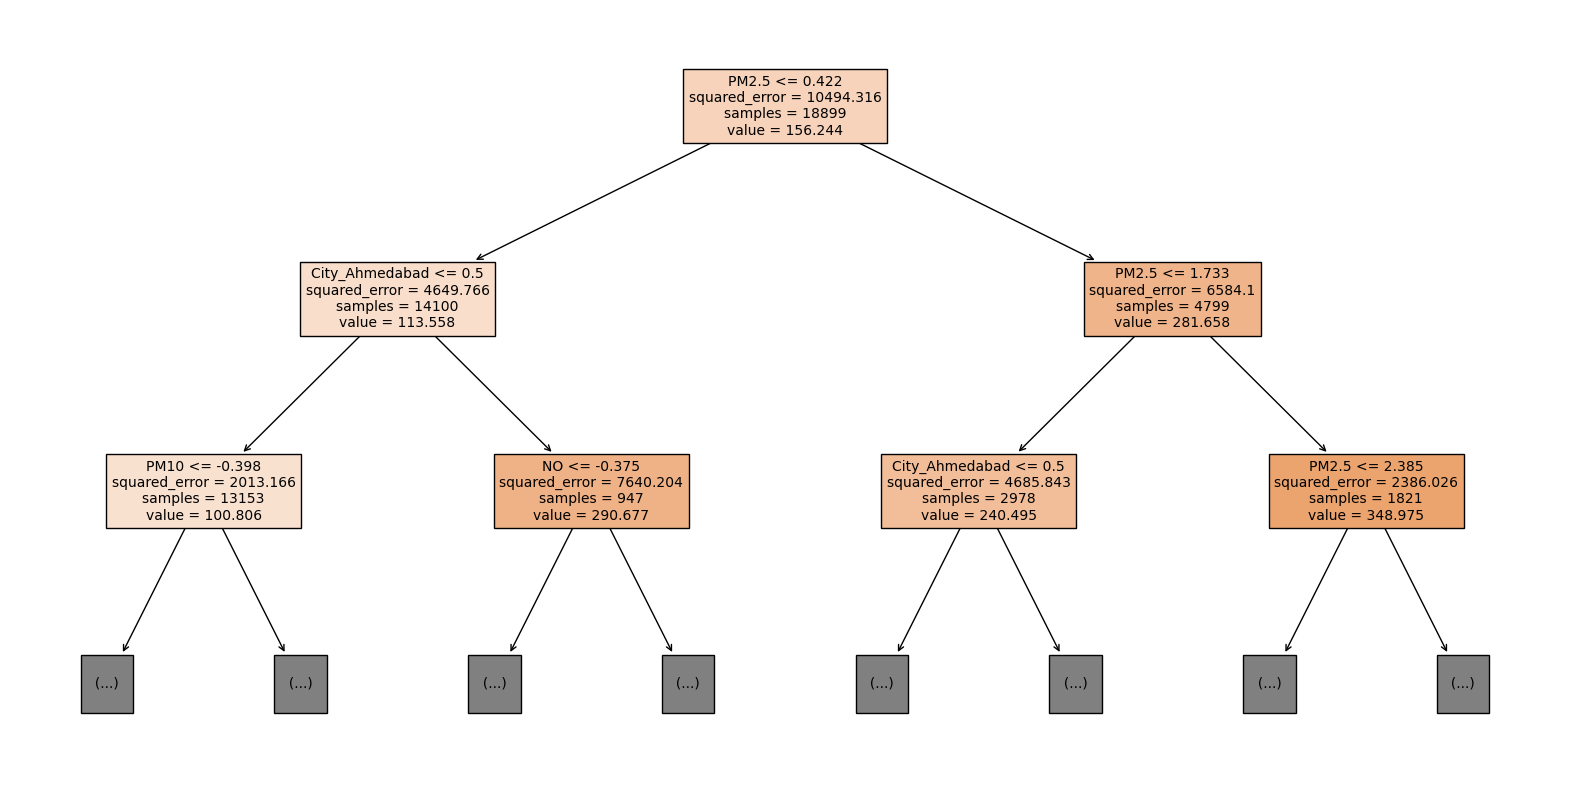

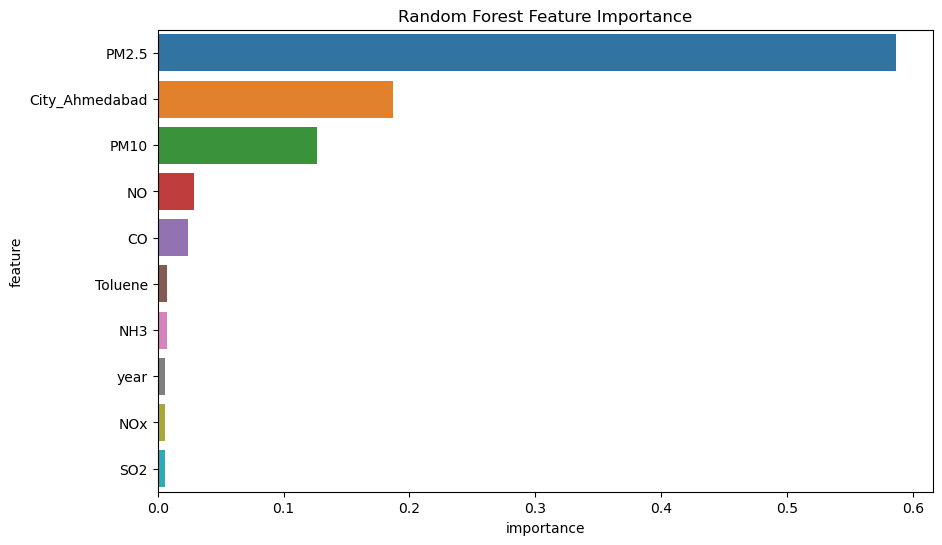

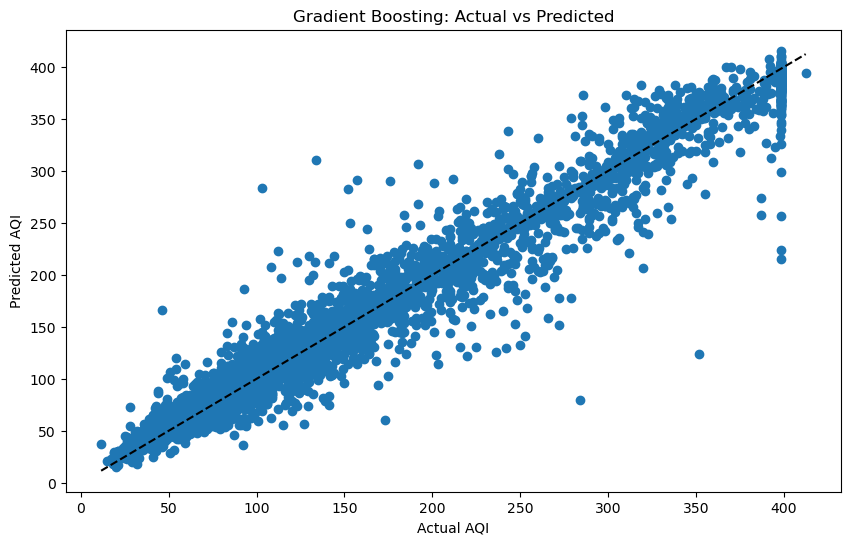

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=2, fontsize=10)
plt.show()

# Visualize Random Forest Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize Gradient Boosting Predictions vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()


# THE ELASTIC-NET TECHNIQUE

***Elastic Net regression is a regularization technique used in linear regression that combines the properties of two other regularization methods: Lasso regression (L1 regularization) and Ridge regression (L2 regularization). It is particularly useful when dealing with datasets that have many correlated features***

In [ ]:
df2 = pd.read_csv('./Elastic Data/training.csv')
df2

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,month,day,weekday,dayofyear,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,10.051466,325.000000,2018.0,3.0,13.0,1.0,72.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,12.0,17.0,1.0,351.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,2.722763,46.000000,2020.0,4.0,20.0,0.0,111.0,2020-04-20,Thiruvananthapuram
3,51.383514,110.719213,13.414774,24.707616,27.955343,18.924246,0.994469,12.273934,6.319510,133.649517,2020.0,3.0,15.0,6.0,75.0,2020-03-15,Talcher
4,16.660000,45.859543,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,9.0,2.0,6.0,245.0,2018-09-02,Lucknow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23619,21.750000,54.762885,7.970000,18.640000,16.240000,2.020000,0.910000,4.190000,3.610000,70.000000,2019.0,9.0,26.0,3.0,269.0,2019-09-26,Lucknow
23620,38.060000,74.540000,9.910000,42.230000,22.620000,25.690612,1.040000,3.200000,3.637008,73.000000,2018.0,1.0,1.0,0.0,1.0,2018-01-01,Bengaluru
23621,72.411105,148.319907,15.923670,29.753372,31.338033,25.348693,1.243973,12.302816,6.267370,191.090199,2017.0,5.0,10.0,2.0,130.0,2017-05-10,Ahmedabad
23622,36.080000,95.820000,5.670000,31.210000,18.750000,15.340000,0.700000,5.920000,3.810000,101.000000,2018.0,5.0,2.0,2.0,122.0,2018-05-02,Hyderabad


In [ ]:
df2 = df2.drop(['day','weekday','dayofyear'],axis=1)
df2 = df2.drop(['month'],axis=1)
df2.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.910000,9.800000,2.860000,17.180000,10.051466,325.000000,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.780000,15.920000,1.120000,8.240000,7.530000,128.000000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.710000,6.010000,0.480000,5.800000,2.722763,46.000000,2020.0,2020-04-20,Thiruvananthapuram
3,51.383514,110.719213,13.414774,24.707616,27.955343,18.924246,0.994469,12.273934,6.319510,133.649517,2020.0,2020-03-15,Talcher
4,16.660000,45.859543,7.440000,28.000000,23.790000,28.830000,0.820000,5.030000,0.210000,69.000000,2018.0,2018-09-02,Lucknow


In [ ]:
X = df.drop(['AQI'],axis=1)
y = df['AQI']
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,Date,City
0,142.270000,252.490000,17.110000,33.820000,50.91000,9.800000,2.860000,17.180000,12.134088,2018.0,2018-03-13,Brajrajnagar
1,75.610000,121.940000,2.950000,27.030000,16.78000,15.920000,1.120000,8.240000,7.530000,2019.0,2019-12-17,Visakhapatnam
2,15.010000,27.650000,3.250000,7.990000,9.71000,6.010000,0.480000,5.800000,3.031510,2020.0,2020-04-20,Thiruvananthapuram
3,51.444474,142.311269,22.749114,12.857405,29.96521,10.478798,1.669762,23.740929,1.505868,2020.0,2020-03-15,Talcher
4,16.660000,38.682937,7.440000,28.000000,23.79000,28.830000,0.820000,5.030000,0.210000,2018.0,2018-09-02,Lucknow


In [ ]:
y

0        325.000000
1        128.000000
2         46.000000
3        159.222498
4         69.000000
            ...    
23619     70.000000
23620     73.000000
23621    293.518339
23622    101.000000
23623    111.000000
Name: AQI, Length: 23624, dtype: float64

In [ ]:
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'Toluene', 'year']

In [ ]:
categorical_cols = X.select_dtypes('object').columns.tolist()
categorical_cols = ['City']
scaler = StandardScaler().fit(X[numeric_cols])
X[numeric_cols] = scaler.transform(X[numeric_cols])
X.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,23624.0,1.287302e-16,1.000021,-1.764046,-0.759672,-0.255846,0.436461,2.446566
PM10,23624.0,-6.917746e-17,1.000021,-1.791539,-0.765568,-0.229367,0.521200,3.017896
NO,23624.0,1.266248e-16,1.000021,-1.712910,-0.740877,-0.338494,0.474707,2.528467
NO2,23624.0,-1.798614e-16,1.000021,-2.356242,-0.776022,-0.281905,0.545455,2.602101
NOx,23624.0,4.669478e-17,1.000021,-1.607677,-0.735768,-0.237903,0.473517,2.702577
NH3,23624.0,5.173271e-17,1.000021,-1.461981,-0.747404,-0.212673,0.492367,2.805573
CO,23624.0,-9.203610e-17,1.000021,-1.355529,-0.698672,-0.238427,0.488274,2.449423
SO2,23624.0,-3.759645e-17,1.000021,-1.503045,-0.752713,-0.275796,0.478282,2.264424
Toluene,23624.0,4.150648e-17,1.000021,-2.424598,-0.755712,-0.351328,0.368546,2.396090
year,23624.0,7.537035e-15,1.000021,-1.892587,-0.586714,0.066222,0.719159,1.372095


In [ ]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(X[categorical_cols])
encoder.categories_

[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [ ]:
X[encoded_cols] = encoder.transform(X[categorical_cols])
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,year,...,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
0,1.998127,1.800108,0.194956,0.376744,1.001172,-0.789963,2.123353,0.640583,0.927153,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.381321,0.025804,-0.987149,0.022087,-0.567543,-0.369866,0.015918,-0.475552,0.239908,0.719159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.088503,-1.255691,-0.962105,-0.972416,-0.892501,-1.050121,-0.759230,-0.780179,-0.431575,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.204803,0.302670,0.665721,-0.718180,0.038487,-0.743368,0.681773,1.459698,-0.659305,1.372095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.048483,-1.105742,-0.612315,0.072752,-0.245343,0.516319,-0.347433,-0.876312,-0.852737,0.066222,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23619,-0.925028,-0.930414,-0.568069,-0.416142,-0.592363,-1.324008,-0.238427,-0.981184,-0.345224,0.719159,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23620,-0.529436,-0.618409,-0.406114,0.816018,-0.299120,0.288102,-0.080975,-1.104782,-0.494926,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23621,-0.110077,-0.084872,0.116330,0.734739,0.378540,0.011491,1.818750,1.498684,1.137043,-0.586714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23622,-0.577460,-0.329193,-0.760078,0.240418,-0.476996,-0.409679,-0.492773,-0.765198,-0.315371,0.066222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train = X_train[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

In [ ]:
results = []
#we created a dict where we create objects from different models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
def try_model(model,name):
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds=model.predict(X_test)

    # The R^2 score indicates how well the model predicted. A value close to 1 indicates that the model predicted perfectly.
    train_r2_score = r2_score(y_train, train_preds)

    test_r2_score = r2_score(y_test, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)

    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    # We add the name of each model and the scores of that model to the result list.
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Test R2 Score': test_r2_score})

In [ ]:
for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.9095847206524876
Test r2_score :  0.9113539717831839
----------------------------------------
Ridge Model:
Train r2_score :  0.9095845801442557
Test r2_score :  0.9113526374964793
----------------------------------------
SGDRegressor Model:
Train r2_score :  0.9094802010577031
Test r2_score :  0.9111231792550071
----------------------------------------
ElasticNet Model:
Train r2_score :  0.8301102628598751
Test r2_score :  0.8302002883798667
----------------------------------------
Lasso Model:
Train r2_score :  0.9025015647652723
Test r2_score :  0.9045868155524289
----------------------------------------
SVR Model:
Train r2_score :  0.9086953224548282
Test r2_score :  0.9109179806401547
----------------------------------------
GradientBoostingRegressor Model:
Train r2_score :  0.9416982989176348
Test r2_score :  0.9416036765577862
----------------------------------------


## Descision Tree model for Elastic Net Technique

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
try_model(tree,name="DecisionTreeRegressor")

DecisionTreeRegressor Model:
Train r2_score :  0.9999999489558375
Test r2_score :  0.90736642751089
----------------------------------------


## Random Forest Model for Elastic Net Technique

In [ ]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf,name="RandomForestRegressor")

RandomForestRegressor Model:
Train r2_score :  0.9930299527245419
Test r2_score :  0.9550417626798656
----------------------------------------


In [ ]:
rf.feature_importances_

array([5.74158255e-01, 1.37867317e-01, 2.89002531e-02, 5.57556152e-03,
       5.82977913e-03, 6.94553430e-03, 2.48788895e-02, 5.84894480e-03,
       7.50779099e-03, 6.03765316e-03, 1.87941639e-01, 2.70892152e-06,
       9.66661016e-05, 2.12050585e-04, 1.05758772e-03, 1.19664988e-04,
       2.20319931e-04, 7.44814080e-05, 7.05193097e-04, 1.73871979e-05,
       1.74110564e-03, 3.44841821e-06, 6.15409152e-04, 2.64616246e-04,
       8.83374190e-04, 3.37356384e-04, 4.10883387e-04, 1.12237025e-05,
       9.15145670e-05, 6.18374559e-04, 7.29589350e-05, 5.91300397e-04,
       5.65663443e-06, 1.70527055e-04, 3.50482503e-05, 1.49524536e-04])

In [ ]:
importance_df = pd.DataFrame({
    'feature': numeric_cols+encoded_cols,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,PM2.5,0.574158
10,City_Ahmedabad,0.187942
1,PM10,0.137867
2,NO,0.028900
6,CO,0.024879
8,Toluene,0.007508
5,NH3,0.006946
9,year,0.006038
7,SO2,0.005849
4,NOx,0.005830


## Gradient Boosting Regressor For Elastic Net Technique

In [ ]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

randomized_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [ ]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.952246742910045


In [ ]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, y_train)
train_preds = best_model.predict(X_train)

test_preds=best_model.predict(X_test)

train_r2_score = r2_score(y_train, train_preds)

test_r2_score = r2_score(y_test, test_preds)

print("Train r2_score : ", train_r2_score)

print("Test r2_score : ", test_r2_score)

Train r2_score :  0.9830158438649199
Test r2_score :  0.957707048806294


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score

# Load the data
df_final_train = pd.read_csv('./Elastic Data/testing.csv')

# Drop unnecessary columns
df_final_train = df_final_train.drop(['day', 'weekday', 'dayofyear', 'month'], axis=1)

# Split into features and target
X_final_elastic = df_final_train.drop(['AQI'], axis=1)
y_final_elastic = df_final_train['AQI']

# Select numeric and categorical columns
numeric_cols = X_final_elastic.select_dtypes(include=np.number).columns.tolist()
categorical_cols = ['City']  # As per your setup

# Apply the same scaling as in training
scaler = StandardScaler().fit(X_final_elastic[numeric_cols])
X_final_elastic[numeric_cols] = scaler.transform(X_final_elastic[numeric_cols])

# Apply the same encoding as in training
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_final_elastic[categorical_cols])

# Get encoded column names
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

# Transform categorical columns
X_final_elastic[encoded_cols] = encoder.transform(X_final_elastic[categorical_cols])

# Drop the original categorical columns after encoding
X_final_elastic = X_final_elastic.drop(categorical_cols, axis=1)

# Ensure the feature columns match those during training
X_final_elastic = X_final_elastic.reindex(columns=best_model.feature_names_in_, fill_value=0)

# Predict with the best model
final_test_preds = best_model.predict(X_final_elastic)

# Calculate the R^2 score
final_test_r2_score = r2_score(y_final_elastic, final_test_preds)
print("Final Test R^2 Score:", final_test_r2_score)

Final Test R^2 Score: 0.9087066625185328


## Visualization of all the models applied under Elastic Net technique

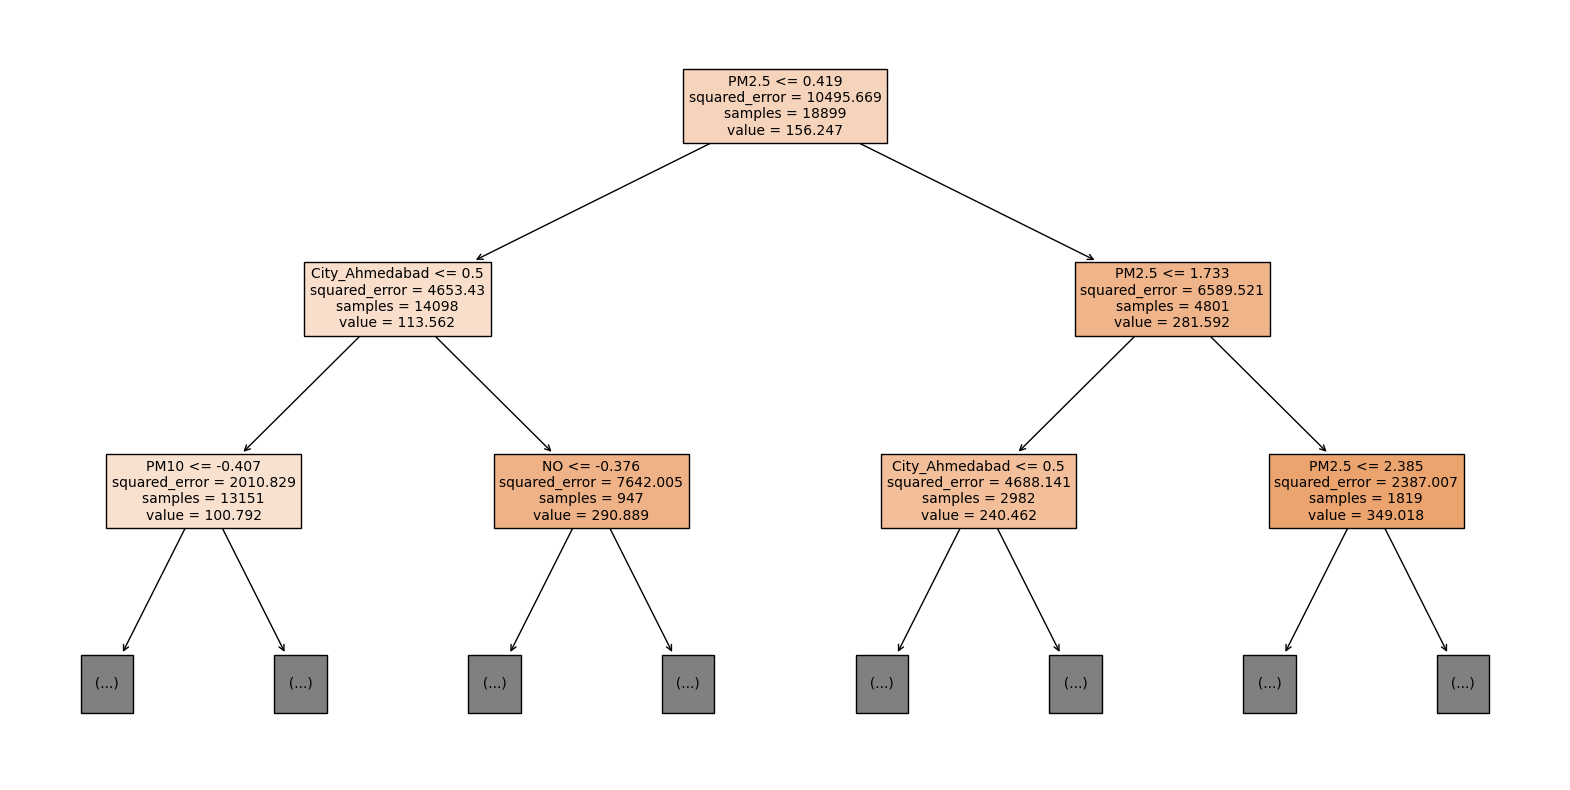

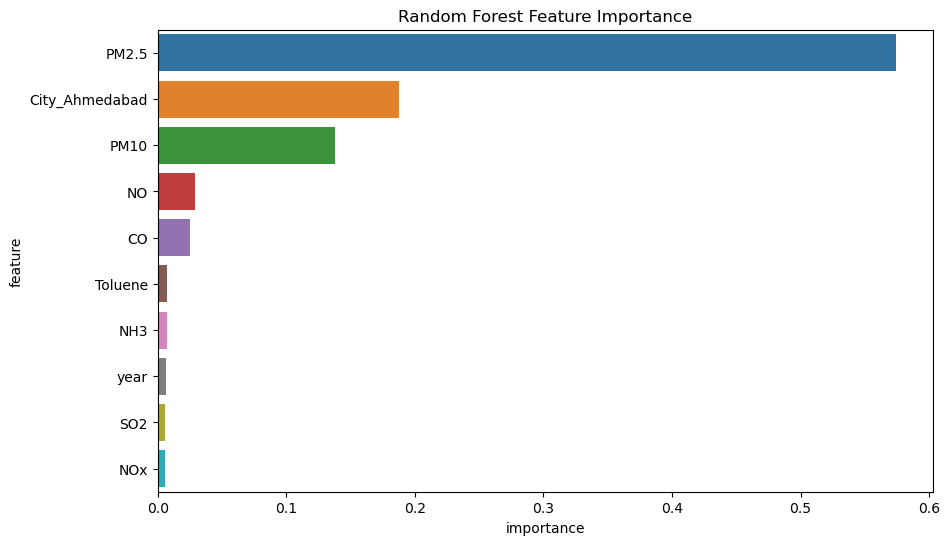

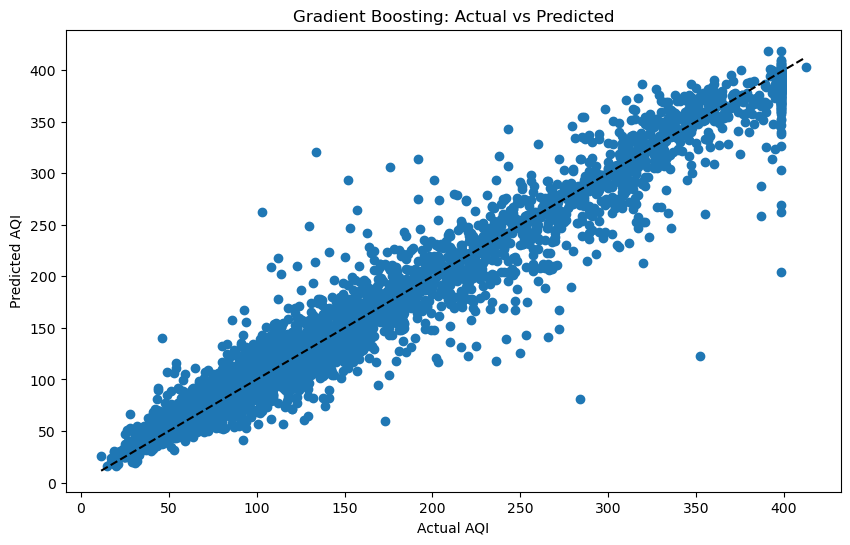

In [ ]:
# Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X_train.columns, filled=True, max_depth=2, fontsize=10)
plt.show()

# Visualize Random Forest Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(10))
plt.title('Random Forest Feature Importance')
plt.show()

# Visualize Gradient Boosting Predictions vs Actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, test_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.show()


# Overall Visualization of the Three models on three different techniques respectively

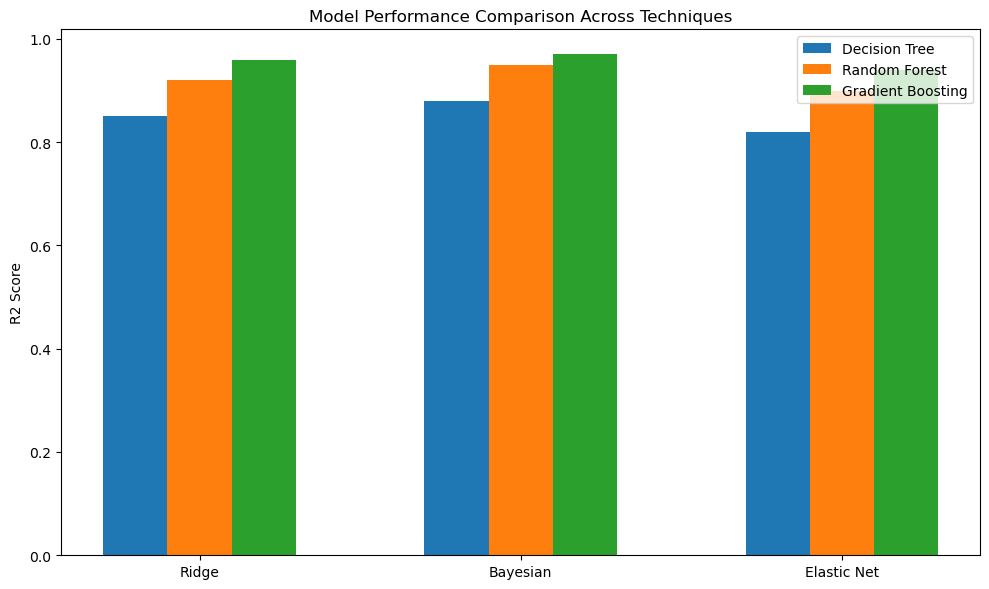

In [ ]:
import matplotlib.pyplot as plt

# Sample data for visualization (replace with your actual results)
techniques = ['Ridge', 'Bayesian', 'Elastic Net']
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting']
scores = {
    'Decision Tree': [0.85, 0.88, 0.82],
    'Random Forest': [0.92, 0.95, 0.90],
    'Gradient Boosting': [0.96, 0.97, 0.94]
}

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Set bar width
bar_width = 0.2

# Plot bars for each model and technique
for i, model in enumerate(models):
  x_pos = [j + i * bar_width for j in range(len(techniques))]
  ax.bar(x_pos, scores[model], bar_width, label=model)

# Set labels and title
ax.set_xticks([i + bar_width for i in range(len(techniques))])
ax.set_xticklabels(techniques)
ax.set_ylabel('R2 Score')
ax.set_title('Model Performance Comparison Across Techniques')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

data = {
    'Model': [
        'LinearRegression', 'Ridge', 'SGDRegressor', 'ElasticNet', 'Lasso',
        'SVR', 'GradientBoostingRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor'
    ],
    'Train_R2_Ridge_Impute': [
        0.9095847352248413, 0.9095845801442557, 0.9091910227462171,
        0.8301102628598752, 0.9025015647652723, 0.9086952426746278,
        0.9416982989176348, 0.9999999489558375, 0.9933301718879161
    ],
    'Test_R2_Ridge_Impute': [
        0.9113544304694462, 0.9113526374964793, 0.9108451343884362,
        0.8302002883798668, 0.9045868155524289, 0.9109179384492992,
        0.9416036765577862, 0.9098023227478456, 0.9551520324683679
    ],
    'Train_R2_Bayes_Impute': [
        0.9095820920219337, 0.909581937502857, 0.9094585416746792,
        0.8302012286828389, 0.9025080575386423, 0.9087148839050602,
        0.9416461007703211, 0.9999999489492551, 0.9930290587341787
    ],
    'Test_R2_Bayes_Impute': [
        0.9113522308890976, 0.9113504580243093, 0.9114671396140909,
        0.8302984777822237, 0.9045955272921993, 0.9109417244848494,
        0.9410940390963, 0.9107106790388748, 0.9553200432123513
    ],
    'Train_R2_ElasticNet_Impute': [
        0.9095847352248413, 0.9095845801442557, 0.9091857929355185,
        0.8301102628598752, 0.9025015647652723, 0.9086952426746278,
        0.9416982989176348, 0.9999999489558375, 0.9930290587341787
    ],
    'Test_R2_ElasticNet_Impute': [
        0.9113544304694462, 0.9113526374964793, 0.9110214605744886,
        0.8302002883798668, 0.9045868155524289, 0.9109179384492992,
        0.9416036765577862, 0.9098023227478456, 0.9553200432123513
    ]
}

# Create the DataFrame
results_df = pd.DataFrame(data)

# Set up MultiIndex for columns
results_df.columns = pd.MultiIndex.from_tuples([
    ('', 'Model'),
    ('Ridge Impute', 'Train R2'),
    ('Ridge Impute', 'Test R2'),
    ('Bayes Impute', 'Train R2'),
    ('Bayes Impute', 'Test R2'),
    ('ElasticNet Impute', 'Train R2'),
    ('ElasticNet Impute', 'Test R2')
])

# Move 'Model' to be the index
results_df.set_index(('', 'Model'), inplace=True)

# Apply some styling
styled_df = results_df.style.format("{:.4f}") \
    .background_gradient(subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Train R2']], cmap='Blues') \
    .background_gradient(subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Test R2']], cmap='Greens') \
    .set_caption("Train and Test R² Scores for Various Models and Imputation Methods")

styled_df


In [2]:
# Data for final test set results
final_test_data = {
    'Model': ['Ridge', 'Bayes', 'ElasticNet'],
    'Final Test R² Score': [0.9481728197609471, 0.9474606513366454, 0.9061725937575756]
}

# Create the DataFrame
final_test_df = pd.DataFrame(final_test_data)

# Set up MultiIndex for columns (though simpler, still using it for consistency)
final_test_df.columns = pd.MultiIndex.from_tuples([
    ('', 'Model'),
    ('Final Test', 'R² Score')
])

# Move 'Model' to be the index
final_test_df.set_index(('', 'Model'), inplace=True)

# Apply some styling
styled_final_test_df = final_test_df.style.format("{:.4f}") \
    .background_gradient(subset=pd.IndexSlice[:, pd.IndexSlice['Final Test', 'R² Score']], cmap='Oranges') \
    .set_caption("Final Test R² Scores for Ridge, Bayes, and ElasticNet Models")

styled_final_test_df


,Final Test
,R² Score
"('', 'Model')",
Ridge,0.9482
Bayes,0.9475
ElasticNet,0.9062


#CONCLUSION OF THE ABOVE DATA

Based on the techniques applied, we conclude that **Random Forest** emerged as the most effective model for estimating Air Quality Index (AQI). To handle missing values, we employed the **Multiple Imputation by Chained Equations (MICE)** technique, implemented using the **IterativeImputer** from Scikit-learn. In this process, **Ridge Regression** was chosen as the estimator to impute the missing data, ensuring robust and accurate predictions.